In [ ]:
import os

# define parameters
my_folder = '/home/terudel/Documents/Enseignement/online/2021-2022/sigmaM2_telea/data/aumelas'
in_vector = os.path.join(my_folder, 'sample_strata.shp')
ref_image = os.path.join(my_folder, 'aumelas_orthoirc.tif')
out_image = os.path.splitext(in_vector)[0] + '_v2.tif'
field_name = 'num'  # field containing the numeric label of the classes

# for those parameters, you know how to get theses information if you had to
sptial_resolution = 0.5
xmin = 748231.0
ymin = 6273800.0
xmax = 751231.0
ymax = 6276800.0

# define command pattern to fill with paremeters
cmd_pattern = ("gdal_rasterize -a {field_name} "
               "-tr {sptial_resolution} {sptial_resolution} "
               "-te {xmin} {ymin} {xmax} {ymax} -ot Byte -of GTiff "
               "{in_vector} {out_image}")

# fill the string with the parameter thanks to format function
cmd = cmd_pattern.format(in_vector=in_vector, xmin=xmin, ymin=ymin, xmax=xmax,
                         ymax=ymax, out_image=out_image, field_name=field_name,
                         sptial_resolution=sptial_resolution)

# execute the command in the terminal
os.system(cmd)

# # for those parameters, you know how to get theses information if you had to
sptial_resolution = 0.5
xmin = 748231.0
ymin = 6273800.0
xmax = 751231.0
ymax = 6276800.0

In [1]:
from osgeo import gdal

#filename = 'data/td_read_and_write/imagette_fabas.tif'
#data_set = gdal.Open(filename, gdal.GA_ReadOnly)
#type(data_set)

In [2]:
def open_image(filename):
    data_set = gdal.Open(filename, gdal.GA_ReadOnly)
    if data_set is None:
      print('Not open {}'.format(filename))
    else:
      print('{} is open'.format(filename))
    
    return data_set

filename = '/home/onyxia/work/Depot_Git/results/data/img_pretraitees/Serie_temp_S2_ndvi.tif'
data_set = open_image(filename)


/home/onyxia/work/Depot_Git/results/data/img_pretraitees/Serie_temp_S2_ndvi.tif is open


/opt/conda/lib/python3.12/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [3]:
def get_image_dimension(data_set):
    nb_col = data_set.RasterXSize
    nb_lignes = data_set.RasterYSize
    nb_band = data_set.RasterCount
    print('Number of columns :', nb_col)
    print('Number of lines :', nb_lignes)
    print('Number of bands :', nb_band)

    return nb_lignes, nb_col, nb_band

nb_lignes, nb_col, nb_band = get_image_dimension(data_set)

Number of columns : 10863
Number of lines : 7381
Number of bands : 6


In [4]:
# geotransform : (527128.0, 2.0, 0.0, 6248618.0, 0.0, -2.0)

def get_origin_coordinates(data_set):
    geotransform = data_set.GetGeoTransform()
    origin_x, origin_y = geotransform[0], geotransform[3]
    print('Origin = ({}, {})'.format(origin_x, origin_y))

    return origin_x, origin_y

origin_x, origin_y = get_origin_coordinates(data_set)

Origin = (501127.9696999999, 6314464.023599998)


In [5]:
def get_pixel_size(data_set):
    geotransform = data_set.GetGeoTransform()
    pixel_size = geotransform[1], geotransform[5]
    print('pixel size = ({})'.format(pixel_size))

    return pixel_size

pixel_size = get_pixel_size(data_set)

pixel size = ((10.0, -10.0))


In [6]:
def get_raster_bounds(data_set):
    geotransform = data_set.GetGeoTransform()
    origin_x, origin_y = geotransform[0], geotransform[3]
    pixel_size_x, pixel_size_y = geotransform[1], geotransform[5]
    raster_x_size = data_set.RasterXSize
    raster_y_size = data_set.RasterYSize

    xmin = origin_x
    xmax = origin_x + raster_x_size * pixel_size_x
    ymax = origin_y
    ymin = origin_y + raster_y_size * pixel_size_y

    print(f"xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")
    print(f"Spatial resolution: ({abs(pixel_size_x)}, {abs(pixel_size_y)})")
    
    return xmin, ymin, xmax, ymax, (abs(pixel_size_x), abs(pixel_size_y))

xmin, ymin, xmax, ymax, spatial_resolution = get_raster_bounds(data_set)


xmin: 501127.9696999999, ymin: 6240654.023599998, xmax: 609757.9696999999, ymax: 6314464.023599998
Spatial resolution: (10.0, 10.0)


In [1]:
import os

# define parameters
my_folder = '/home/onyxia/work/Depot_Git/results/data'
in_vector = os.path.join(my_folder, 'sample/Sample_BD_foret_T31TCJ.shp')
ref_image = os.path.join(my_folder, 'img_pretraitees/Serie_temp_S2_ndvi.tif')
out_image = os.path.splitext(in_vector)[0] + '_v2.tif'
field_name = 'Code'  # field containing the numeric label of the classes

# for those parameters, you know how to get theses information if you had to
sptial_resolution = 10
xmin = 501127.9696999999
ymin = 6240654.023599998
xmax = 609757.9696999999
ymax = 6314464.023599998

# define command pattern to fill with paremeters
cmd_pattern = ("gdal_rasterize -a {field_name} "
               "-tr {sptial_resolution} {sptial_resolution} "
               "-te {xmin} {ymin} {xmax} {ymax} -ot Byte -of GTiff "
               "{in_vector} {out_image}")

# fill the string with the parameter thanks to format function
cmd = cmd_pattern.format(in_vector=in_vector, xmin=xmin, ymin=ymin, xmax=xmax,
                         ymax=ymax, out_image=out_image, field_name=field_name,
                         sptial_resolution=sptial_resolution)

# execute the command in the terminal
os.system(cmd)

0...10...20...30...40...50...60...70...80...90...100 - done.


0

# Lecteur image sous la forme tableau numpy !!!


In [4]:
import os
import numpy as np
# personal librairies
import classification as cla
import read_and_write as rw

my_folder = '/home/onyxia/work/Depot_Git/results/data'
sample_filename = os.path.join(my_folder, 'sample/Sample_BD_foret_T31TCJ_v2.tif')
image_filename = os.path.join(my_folder, 'img_pretraitees/Serie_temp_S2_ndvi.tif')
X, Y, t = cla.get_samples_from_roi(image_filename, sample_filename)
print(X.shape)
print(Y.shape)

/opt/conda/lib/python3.12/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


(4997108, 6)
(4997108, 1)


In [5]:
# Verificar los valores de X
min_X = X.min()  # Valor mínimo en X
max_X = X.max()  # Valor máximo en X
print(f"Valor mínimo de X: {min_X}")
print(f"Valor máximo de X: {max_X}")

# Verificar si hay valores fuera del rango esperado de NDVI (-1 a 1)
out_of_range = X[(X < -1) | (X > 1)]  # Filtrar valores fuera del rango [-1, 1]
if len(out_of_range) > 0:
    print(f"Valores fuera del rango encontrados: {out_of_range}")
else:
    print("No se encontraron valores fuera del rango de NDVI.")

Valor mínimo de X: 0.0
Valor máximo de X: 1129.82763671875
Valores fuera del rango encontrados: [ 75.24856  97.58122 234.85663 ... 137.10042 189.28323 209.3067 ]


In [6]:
# Inspeccionar las primeras filas de X y Y
print("Primeras 5 filas de X:")
print(X[:5])  # Primeras 5 muestras de características

print("Primeras 5 etiquetas en Y:")
print(Y[:5])  # Primeras 5 etiquetas asociadas

# Convertir t a una lista de tuplas (x, y)
coords = list(zip(t[0], t[1]))

# Ver las primeras 5 coordenadas
print("Primeras 5 coordenadas convertidas:")
print(coords[:5])




Primeras 5 filas de X:
[[0.4382772  0.57193816 0.65543646 0.49634117 0.31929183 0.70168537]
 [0.448      0.6099796  0.69306123 0.5094035  0.3145946  0.69908696]
 [0.6382708  0.742119   0.7870801  0.54091394 0.3303602  0.812103  ]
 [0.5118004  0.57911    0.6497373  0.55889887 0.4703512  0.6795367 ]
 [0.70802194 0.73612887 0.7575246  0.5393292  0.2987512  0.74483776]]
Primeras 5 etiquetas en Y:
[[12]
 [12]
 [12]
 [12]
 [12]]
Primeras 5 coordenadas convertidas:
[(np.int64(77), np.int64(8124)), (np.int64(78), np.int64(8124)), (np.int64(78), np.int64(8125)), (np.int64(79), np.int64(8124)), (np.int64(79), np.int64(8125))]


In [7]:
import numpy as np

# Asegúrate de que Y tenga la forma correcta, aplanándola
Y = Y.flatten()  # Convierte Y de (4997108, 1) a (4997108,)

# Verifica que las dimensiones de X y Y sean correctas
print(X.shape)  # (4997108, 6)
print(Y.shape)  # (4997108,)

# Convertir los códigos de interés a cadenas
codes_of_interest = ['12', '13', '14', '23', '24', '25']

# Filtrar X y Y por las clases de interés
mask = np.isin(Y.astype(str), codes_of_interest)  # Convertir Y a cadenas para compararlo con los códigos de interés

# Filtrar las muestras
X_filtered = X[mask]  # Seleccionar solo las muestras correspondientes
Y_filtered = Y[mask]  # Seleccionar solo las clases correspondientes

# Verificar el tamaño después del filtro
print("Shape de X_filtered:", X_filtered.shape)
print("Shape de Y_filtered:", Y_filtered.shape)



print("Primeras 5 etiquetas en Y:")
print(Y[:5])  # Primeras 5 etiquetas asociadas


(4997108, 6)
(4997108,)
Shape de X_filtered: (2387823, 6)
Shape de Y_filtered: (2387823,)
Primeras 5 etiquetas en Y:
[12 12 12 12 12]


In [8]:
# Verificar las clases únicas en Y
unique_classes_in_y = np.unique(Y)
print(f"Clases únicas en Y: {unique_classes_in_y}")


Clases únicas en Y: [11 12 13 14 15 16 21 22 23 24 25 26 27 28 29]


In [9]:
# Verificar las primeras filas de X y Y
print("Primeras 5 clases en Y:", Y[:5])
print("Primeras 5 muestras en X:", X[:5])


Primeras 5 clases en Y: [12 12 12 12 12]
Primeras 5 muestras en X: [[0.4382772  0.57193816 0.65543646 0.49634117 0.31929183 0.70168537]
 [0.448      0.6099796  0.69306123 0.5094035  0.3145946  0.69908696]
 [0.6382708  0.742119   0.7870801  0.54091394 0.3303602  0.812103  ]
 [0.5118004  0.57911    0.6497373  0.55889887 0.4703512  0.6795367 ]
 [0.70802194 0.73612887 0.7575246  0.5393292  0.2987512  0.74483776]]


In [10]:
# Verificar todas las clases únicas en Y
unique_classes_in_Y = np.unique(Y.astype(str))
print("Clases únicas en Y:", unique_classes_in_Y)

# Asegurarse de que no haya espacios en blanco en las clases de Y
Y_cleaned = np.array([str(y).strip() for y in Y])  # Eliminar espacios en blanco
mask = np.isin(Y_cleaned, codes_of_interest)  # Filtrar usando las clases de interés

# Filtrar las muestras nuevamente
X_filtered = X[mask]
Y_filtered = Y[mask]

# Verificar el tamaño después del filtro
print("Shape de X_filtered después de limpiar Y:", X_filtered.shape)
print("Shape de Y_filtered después de limpiar Y:", Y_filtered.shape)

# Verificar algunas muestras filtradas
print("Primeras 5 muestras filtradas de X:", X_filtered[:5])
print("Primeras 5 clases filtradas de Y:", Y_filtered[:5])


Clases únicas en Y: ['11' '12' '13' '14' '15' '16' '21' '22' '23' '24' '25' '26' '27' '28'
 '29']
Shape de X_filtered después de limpiar Y: (2387823, 6)
Shape de Y_filtered después de limpiar Y: (2387823,)
Primeras 5 muestras filtradas de X: [[0.4382772  0.57193816 0.65543646 0.49634117 0.31929183 0.70168537]
 [0.448      0.6099796  0.69306123 0.5094035  0.3145946  0.69908696]
 [0.6382708  0.742119   0.7870801  0.54091394 0.3303602  0.812103  ]
 [0.5118004  0.57911    0.6497373  0.55889887 0.4703512  0.6795367 ]
 [0.70802194 0.73612887 0.7575246  0.5393292  0.2987512  0.74483776]]
Primeras 5 clases filtradas de Y: [12 12 12 12 12]


/tmp/ipykernel_23436/609399810.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Clases", loc='upper left')


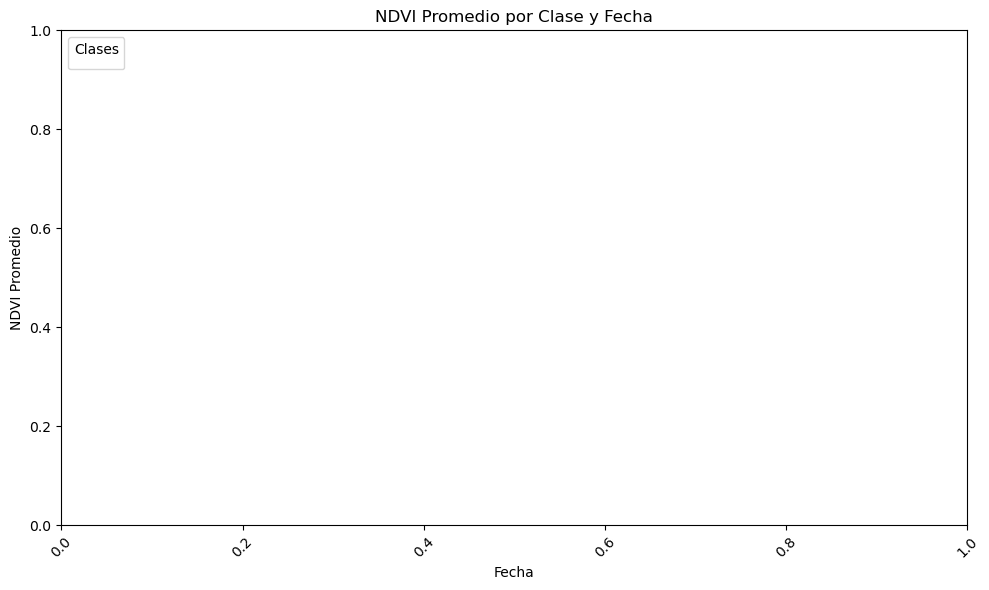

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Fechas correspondientes a las 6 bandas
dates = ['2023-01-01', '2023-03-01', '2023-05-01', '2023-07-01', '2023-09-01', '2023-11-01']

# Colores para las clases
colors = ['tan', 'palegreen', 'limegreen', 'darkgreen', 'lightblue', 'orange']
# Nombres de las clases
class_names = ['Chêne', 'Robinier', 'Peupleraie', 'Douglas', 'Pin laricio ou pin noir', 'Pin maritime']

# Preparar un gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Recorrer las clases y calcular la media y la desviación estándar para cada una
for idx, code in enumerate(codes_of_interest):
    # Filtrar X y Y para la clase actual
    X_class = X_filtered[Y_filtered == code]
    
    # Verificar si hay muestras para la clase
    if X_class.shape[0] > 0:
        # Calcular la media y la desviación estándar para cada banda (columna)
        means = X_class.mean(axis=0)
        stds = X_class.std(axis=0)
        
        # Graficar la media
        ax.plot(dates, means, color=colors[idx], label=class_names[idx])
        # Rellenar con la desviación estándar
        ax.fill_between(dates, means - stds, means + stds, color=colors[idx], alpha=0.3)

# Configurar etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('NDVI Promedio')
ax.set_title('NDVI Promedio por Clase y Fecha')
ax.legend(title="Clases", loc='upper left')

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/tmp/ipykernel_23436/1812531210.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Clases", loc='upper left')


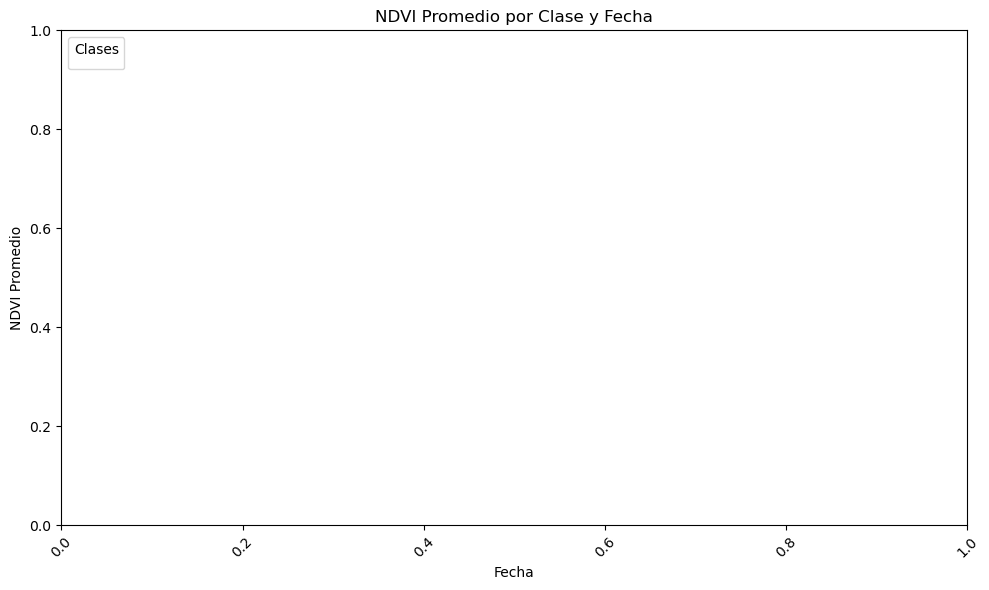

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Fechas correspondientes a las 6 bandas
dates = ['2023-01-01', '2023-03-01', '2023-05-01', '2023-07-01', '2023-09-01', '2023-11-01']

# Colores para las clases
colors = ['tan', 'palegreen', 'limegreen', 'darkgreen', 'lightblue', 'orange']
# Nombres de las clases
class_names = ['Chêne', 'Robinier', 'Peupleraie', 'Douglas', 'Pin laricio ou pin noir', 'Pin maritime']

# Preparar un gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Recorrer las clases y calcular la media y la desviación estándar para cada una
for idx, code in enumerate(codes_of_interest):
    # Filtrar X y Y para la clase actual
    X_class = X_filtered[Y_filtered == code]
    
    # Verificar si hay muestras para la clase
    if X_class.shape[0] > 0:
        # Calcular la media y la desviación estándar para cada banda (columna)
        means = X_class.mean(axis=0)
        stds = X_class.std(axis=0)
        
        # Graficar la media
        ax.plot(dates, means, color=colors[idx], label=class_names[idx])
        # Rellenar con la desviación estándar
        ax.fill_between(dates, means - stds, means + stds, color=colors[idx], alpha=0.3)

# Configurar etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('NDVI Promedio')
ax.set_title('NDVI Promedio por Clase y Fecha')

# Limitar el rango de NDVI entre -1 y 1
ax.set_ylim(0, 1)

# Añadir una leyenda
ax.legend(title="Clases", loc='upper left')

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_23436/2115488106.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Clases", loc='upper left')


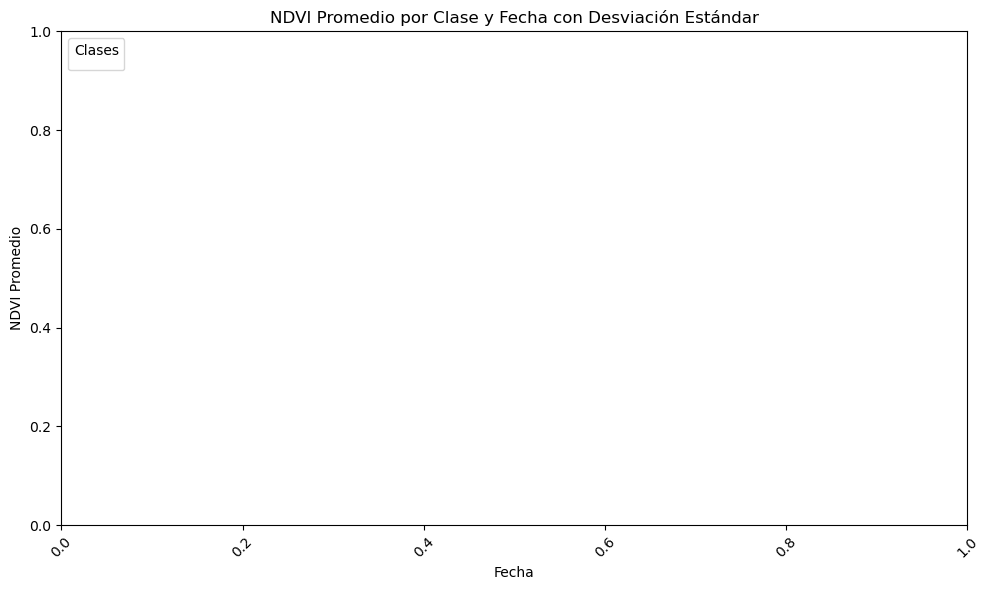

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Fechas correspondientes a las 6 bandas
dates = ['2023-01-01', '2023-03-01', '2023-05-01', '2023-07-01', '2023-09-01', '2023-11-01']

# Colores más diferenciados
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Paleta de colores

# Nombres de las clases
class_names = ['Chêne', 'Robinier', 'Peupleraie', 'Douglas', 'Pin laricio ou pin noir', 'Pin maritime']

# Preparar un gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Recorrer las clases y calcular la media y desviación estándar para cada una
for idx, code in enumerate(codes_of_interest):
    # Filtrar X y Y para la clase actual
    X_class = X_filtered[Y_filtered == code]
    
    # Verificar si hay muestras para la clase
    if X_class.shape[0] > 0:
        # Calcular la media y desviación estándar para cada banda (columna)
        means = X_class.mean(axis=0)
        stds = X_class.std(axis=0)
        
        # Graficar la media
        ax.plot(dates, means, color=colors[idx], label=class_names[idx])
        
        # Graficar el área sombreada para la desviación estándar
        ax.fill_between(dates, means + stds, means - stds, color=colors[idx], alpha=0.3)

# Configurar etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('NDVI Promedio')
ax.set_title('NDVI Promedio por Clase y Fecha con Desviación Estándar')

# Limitar el rango de NDVI entre -1 y 1
ax.set_ylim(0, 1)

# Añadir una leyenda
ax.legend(title="Clases", loc='upper left')

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Verificar la cantidad de muestras por clase y por fecha
for idx, code in enumerate(codes_of_interest):
    X_class = X_filtered[Y_filtered == code]
    print(f"Clase: {class_names[idx]} (Código: {code})")
    print(f"Número de muestras para esta clase: {X_class.shape[0]}")
    if X_class.shape[0] > 0:
        print(f"Primeras 5 muestras: {X_class[:5]}")
    else:
        print("No hay muestras para esta clase.")


Clase: Chêne (Código: 12)
Número de muestras para esta clase: 0
No hay muestras para esta clase.
Clase: Robinier (Código: 13)
Número de muestras para esta clase: 0
No hay muestras para esta clase.
Clase: Peupleraie (Código: 14)
Número de muestras para esta clase: 0
No hay muestras para esta clase.
Clase: Douglas (Código: 23)
Número de muestras para esta clase: 0
No hay muestras para esta clase.
Clase: Pin laricio ou pin noir (Código: 24)
Número de muestras para esta clase: 0
No hay muestras para esta clase.
Clase: Pin maritime (Código: 25)
Número de muestras para esta clase: 0
No hay muestras para esta clase.


In [15]:
# Verificar la varianza (desviación estándar) de las clases
for idx, code in enumerate(codes_of_interest):
    X_class = X_filtered[Y_filtered == code]
    if X_class.shape[0] > 0:
        stds = X_class.std(axis=0)
        print(f"Clase: {class_names[idx]} (Código: {code})")
        print(f"Desviación estándar por fecha: {stds}")
        if np.all(stds == 0):
            print("¡Advertencia! La desviación estándar es 0 para todas las fechas.")


In [43]:
# Verificar valores de NDVI para la primera fecha (banda 1) para todas las clases
banda1_values = X_filtered[:, 0]  # Primera banda (banda 1)
print("Premières valeurs NDVI pour la première date (bande 1) :")
print(banda1_values[:20])  # Mostrar los primeros 20 valores

# Verificar si hay valores fuera del rango esperado para NDVI (-1, 1)
out_of_range_values = banda1_values[(banda1_values < -1) | (banda1_values > 1)]
print("Valeurs hors limites au premier rendez-vous (bande 1) :")
print(out_of_range_values[:20])  # Mostrar algunos valores fuera del rango


Premières valeurs NDVI pour la première date (bande 1) :
[0.4382772  0.448      0.6382708  0.5118004  0.70802194 0.5278351
 0.6368918  0.50426024 0.59365994 0.4893365  0.51985776 0.5609756
 0.5656109  0.6034115  0.5115741  0.55778897 0.4985039  0.5379276
 0.5285714  0.5262248 ]
Valeurs hors limites au premier rendez-vous (bande 1) :
[ 75.24856   97.58122   53.69351   41.758797  48.9716    40.79712
  46.945404  72.50333   44.72821   50.72847   46.698788  45.14335
  50.749805  55.60153   49.710705  43.6159    44.026226  38.45583
  34.93387  239.9597  ]
